# Book Recommendation System

Goal : To build a recommendation system that gives Top-5 recoomendations based on the contents of the last book read.

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Getting Data

In [2]:
books = pd.read_csv("goodreads_top100.csv")

In [3]:
books.head()

,Sequecence,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,0,0,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",04.09,264630
3,3,Firestarter,0,0,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,0,0,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sequecence        4400 non-null   int64  
 1   Book              4400 non-null   object 
 2   Series            4400 non-null   object 
 3   Release number    4400 non-null   object 
 4   Author            4400 non-null   object 
 5   Description       4400 non-null   object 
 6   Num Pages         4366 non-null   float64
 7   Format            4400 non-null   object 
 8   Genres            4400 non-null   object 
 9   Publication Date  4400 non-null   object 
 10  Rating            4400 non-null   object 
 11  Number of voters  4400 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 412.6+ KB


In [5]:
df = books.copy()

In [6]:
df.columns

Index(['Sequecence', 'Book', 'Series', 'Release number', 'Author',
       'Description', 'Num Pages', 'Format', 'Genres', 'Publication Date',
       'Rating', 'Number of voters'],
      dtype='object')

In [7]:
df.head()

,Sequecence,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,0,0,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",04.09,264630
3,3,Firestarter,0,0,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,0,0,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686


In [8]:
df.tail()

,Sequecence,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
4395,4395,Sword Catcher,Sword Catcher,1,Cassandra Clare,"In the vibrant city-state of Castellane, the r...",624.0,Hardcover,"['Fantasy', 'Romance', 'Adult', 'Young Adult',...","October 10, 2023",3.85,12662
4396,4396,The Covenant of Water,0,0,Abraham Verghese,"A stunning and magisterial new epic of love, f...",724.0,Hardcover,"['Fiction', 'Historical Fiction', 'India', 'Au...","May 2, 2023",4.49,111236
4397,4397,"Poverty, by America",0,0,Matthew Desmond,"The Pulitzer Prize–winning, bestselling author...",284.0,Hardcover,"['Nonfiction', 'Politics', 'Sociology', 'Histo...","March 21, 2023",4.30,25676
4398,4398,Finlay Donovan Jumps the Gun,Finlay Donovan,3,Elle Cosimano,Author and single mom Finlay Donovan has been ...,304.0,Hardcover,"['Mystery', 'Audiobook', 'Fiction', 'Mystery T...","January 31, 2023",3.82,46020
4399,4399,Murder Your Employer: The McMasters Guide to H...,0,0,Rupert Holmes,A devilish thriller with a killer concept: The...,389.0,Hardcover,"['Mystery', 'Fiction', 'Thriller', 'Mystery Th...","February 21, 2023",3.90,19625


- Books from 1980 to 2023 comprises for 4400 books
- The books can be divided publication Year wise

## Exploratory Data Analysis

In [7]:
df.describe()

,Sequecence,Num Pages,Number of voters
count,4400.000000,4366.000000,4.400000e+03
mean,2199.500000,373.795007,1.422139e+05
std,1270.314922,175.878588,3.917586e+05
min,0.000000,2.000000,4.000000e+00
25%,1099.750000,278.000000,1.265300e+04
50%,2199.500000,352.000000,4.160300e+04
75%,3299.250000,440.000000,1.187932e+05
max,4399.000000,1859.000000,9.848880e+06


In [9]:
df['Release number'].nunique()

100

In [10]:
df['Release number'].unique()

array(['2', '0', '1', '3', '4', '7', '5', '6', '8', '9', '11', '1-3',
       '1-2', '32', '1,1', '12', '13', '24', '34', '10', '14', '21',
       '1-4', '2,2', '4,1', '3,1', '6,2', '15', '1,4', '8,1', '17',
       '21,4', '16', '10,1', '11,2', '12,3', '18', '3-4', '45', '14,4',
       '19', '15,2', '0.5', '1,6', '11.5', '16,3', '3,3', '20', '18,5',
       '4,4', '1,5', '19,3', '8,9', '23', '5,6', '47', '23,6', '22,6',
       '2,1', '24,5', '6,8', '22', '0A', '25', '7,1', '28', '26,5',
       '29,6', '8,11', '3,0B', '31,3', '30,1', '9,12', '33', '32,2',
       '10,13', '1,15', '34,7', '11,14', '12,16', '7,3', '13,17', '25.5',
       '18,4,2002', '38,4', '2,5', '3,8', '3.5', '5,1', '1.5', '2.5',
       '8,2', '3.1', '3,2', '3.6', '4.5', '44', '1,13', '2,10.6',
       '1,10.5'], dtype=object)

It is not possible to pinpoint the pattern of Release Number. However, it does not have a great significance in a recommendation system.

In [11]:
#Cleaning publishing date column
c=0
for i in range(len(df)):
    df['Publication Date'][c] = df['Publication Date'][c].replace(' ','')
    c = c + 1

In [12]:
#Separating publishing month and year for exploration
c = 0
df['Publication_Year'] = ''
df['Publication_Month'] = ''
for i in range(len(df)):
    try:
        df['Publication_Year'][c] = df['Publication Date'][c].split(',')[1]
        df['Publication_Month'][c] = df['Publication Date'][c].split(',')[0]
    except:
        pass
    c = c + 1

In [13]:
import re
c = 0
for i in range(len(df)):
    df['Publication_Month'][c] = re.sub('\d','',df['Publication_Month'][c])
    df['Publication_Month'][c] = re.sub('Published','',df['Publication_Month'][c])
    c=c+1
    

In [14]:
df.head()

,Sequecence,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters,Publication_Year,Publication_Month
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October12,1980",4.21,283375,1980,October
1,1,The Name of the Rose,0,0,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January1,1980",4.14,360732,1980,January
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January1,1980",04.09,264630,1980,January
3,3,Firestarter,0,0,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September29,1980",3.91,226270,1980,September
4,4,Cosmos,0,0,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January1,1980",4.39,144686,1980,January


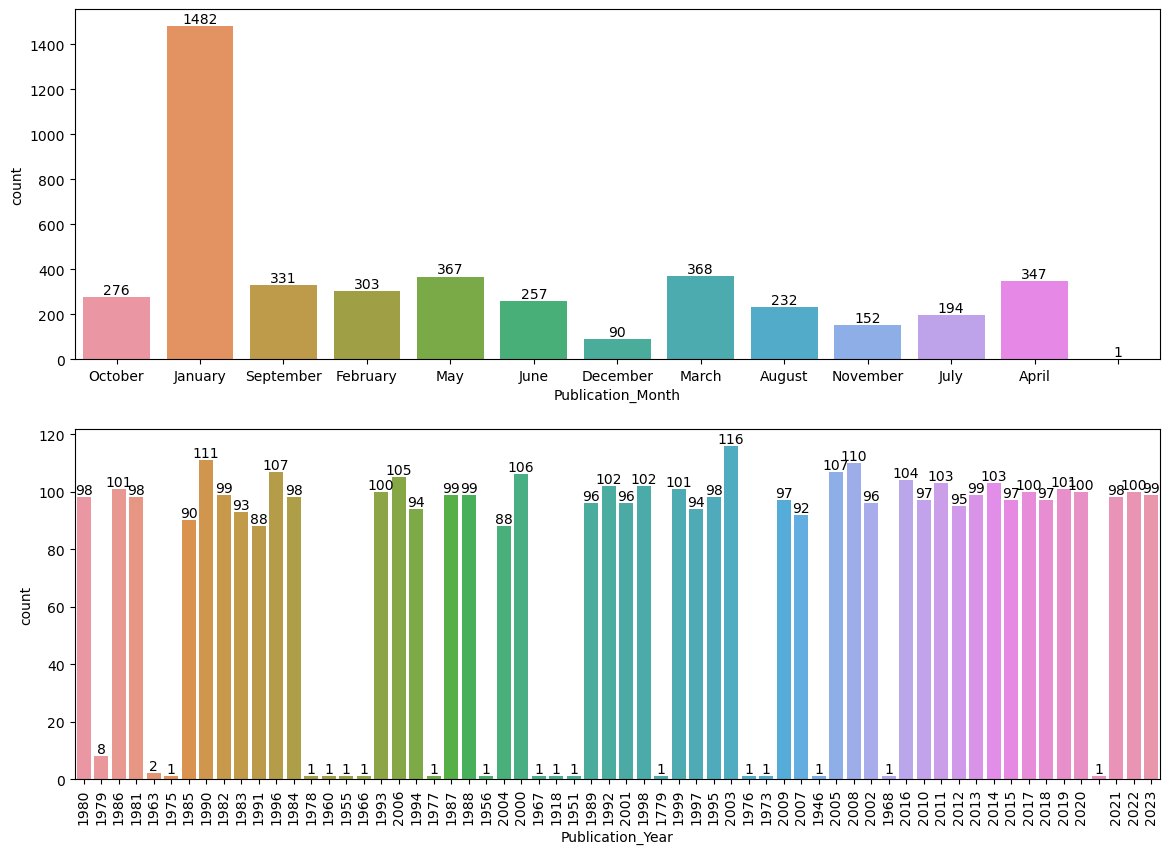

In [15]:
#Month-wise and year-wise publications
f,axes = plt.subplots(2,1,figsize=(14,10))
ax = sns.countplot(x = df['Publication_Month'],ax=axes[0])
for i in ax.containers:
    ax.bar_label(i)
ax = sns.countplot(x = df['Publication_Year'],ax=axes[1])
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation=90)

- Maximum number of publications happened in January
- The top 100 books is not only based on date of publication. It consists of all books from years before 1980 also.

So month and year of publication does not play any role in recommendation system.

<Axes: xlabel='Num Pages', ylabel='Count'>

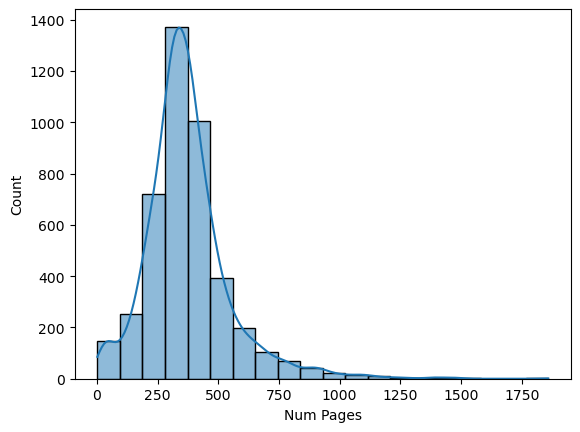

In [16]:
#Number of Pages distribution
sns.histplot(x = df['Num Pages'], bins=20, kde=True)


Most number of pages lie between 250 to 500 pages.

In [17]:
#Format of book
df['Format'].value_counts()

Paperback                    1824
Hardcover                    1366
Mass Market Paperback         717
Kindle Edition                265
ebook                         129
Nook                           14
Audio CD                       11
Library Binding                 9
Board book                      6
['ebook']                       6
Board Book                      6
Audio Cassette                  5
Trade Paperback                 5
['Paperback']                   4
['Audio Cassette']              4
['Audio CD']                    3
Unknown Binding                 2
Audiobook                       2
['Mass Market Paperback']       2
['315 pages']                   1
['688 pages']                   1
['309 pages']                   1
['295 pages']                   1
['244 pages']                   1
['297 pages']                   1
['335 pages']                   1
['147 pages']                   1
['400 pages']                   1
['30 pages']                    1
['502 pages'] 

In [18]:
#Cleaning the types of formats for plotting
c = 0
for i in range(len(df)):
    df['Format'][c] = re.sub("['']",'',df['Format'][c])   
    df['Format'][c] = df['Format'][c].replace("[",'')
    df['Format'][c] = df['Format'][c].replace("]",'')
    c=c+1
    

In [19]:
#Cleaning the types of formats for plotting
formats = ['Paperback', 'Mass Market Paperback', 'Hardcover',
       'Library Binding', 'Kindle Edition', 'hardcover',
       'Audio Cassette', 'Board Book', 'Board book', 'Broschiert',
       'paper', 'ebook', 'Unknown Binding', 'Trade Paperback', 
       'Audio CD', 'Audiobook', 'Slipcased Hardcover',
       'Print', 'Nook']
c = 0
for i in range(len(df)):
    if df['Format'][c] not in formats:
        df['Format'][c] = 'Unknown Binding'
    c = c + 1
    

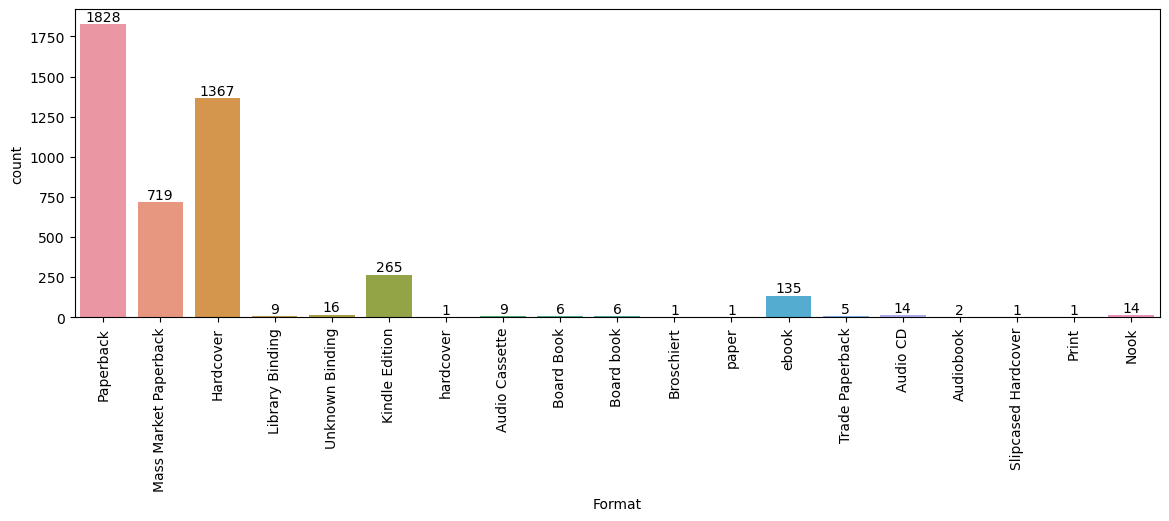

In [20]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x = df['Format'])
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation=90)

Most formats are in Paperback followed by Hardcover

In [21]:
#Cleaning the rating column
c = 0
for i in range(len(df)):
    try:
        df['Rating'][c] = float(df['Rating'][c])
    except:
        pass
    c = c + 1

In [22]:
#Replacing 'real' rating with median rating
x = list(df['Rating'].unique())
x.remove('real')
import statistics
median = statistics.median(x)
c = 0
for i in range(len(df)):
    if df['Rating'][c] == 'real':
        df['Rating'][c] = median 
    c = c + 1

<Axes: xlabel='Number of voters', ylabel='Count'>

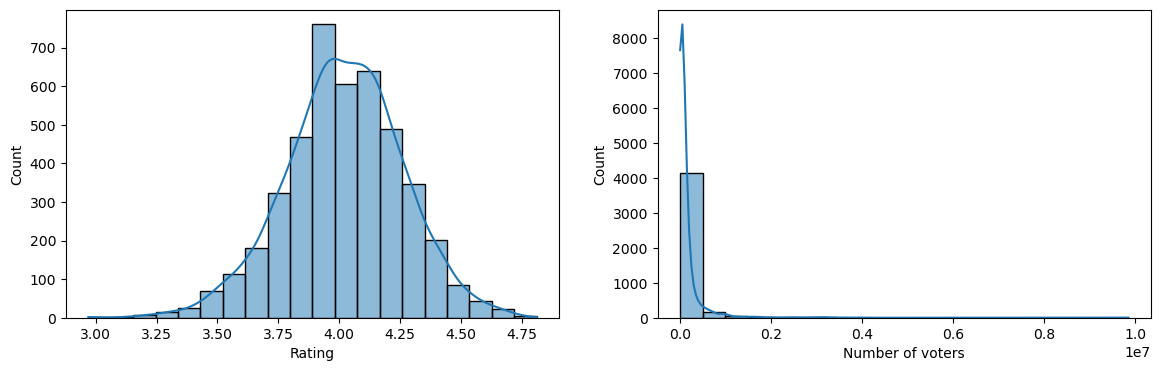

In [23]:
f,axes = plt.subplots(1,2,figsize=(14,4))
sns.histplot(x = df['Rating'],bins=20,kde=True,ax=axes[0])
sns.histplot(x = df['Number of voters'],bins=20,kde=True,ax=axes[1])

- Entire ratings lie between 3 to 4.75 indicating neutral to positive sentiments. The distribution is almost normal.
- The number of voters has outliers. This column is not significant for a recommendation system.

In [24]:
#Cleaning the Genre column
c = 0
for j in range(len(df['Genres'])):
    x = df['Genres'][c]
    p = []
    res = x.strip('][').split(',')
    for i in res:
        i = i.replace("'",'')
        i = i.replace(" ",'')
        p.append(i)
    df['Genres'][c] = p
    c = c + 1

In [25]:
#Finding the primary genre 
df['Primary_Genre'] = ''
c = 0
for i in range(len(df)):
    df['Primary_Genre'][c]=df['Genres'][c][0]
    c = c + 1

In [26]:
df['Primary_Genre'].value_counts()

Fiction             820
Fantasy             789
Romance             435
Mystery             433
YoungAdult          286
                   ... 
GermanLiterature      1
Animals               1
MiddleGrade           1
fiction               1
Spirituality          1
Name: Primary_Genre, Length: 90, dtype: int64

There are total 90 types of primary genres out of which Fiction, Fantasy and Romance comprise the top 3.

In [27]:
#Dividing decade-wise
c = 0
df['Decade'] = ''
for i in range(len(df)):
    if df['Publication_Year'][c] >= '1980' and df['Publication_Year'][c] < '1990':
        df['Decade'][c] = '1980s'
    elif df['Publication_Year'][c] >= '1990' and df['Publication_Year'][c] < '2000':
        df['Decade'][c] = '1990s'
    elif df['Publication_Year'][c] >= '2000' and df['Publication_Year'][c] < '2010':
        df['Decade'][c] = '2000s'
    elif df['Publication_Year'][c] >= '2010' and df['Publication_Year'][c] < '2020':
        df['Decade'][c] = '2010s'
    elif df['Publication_Year'][c] >= '2020':
        df['Decade'][c] = '2020s'
    else:
        df['Decade'][c] = 'Before 1980'
    c = c + 1
    

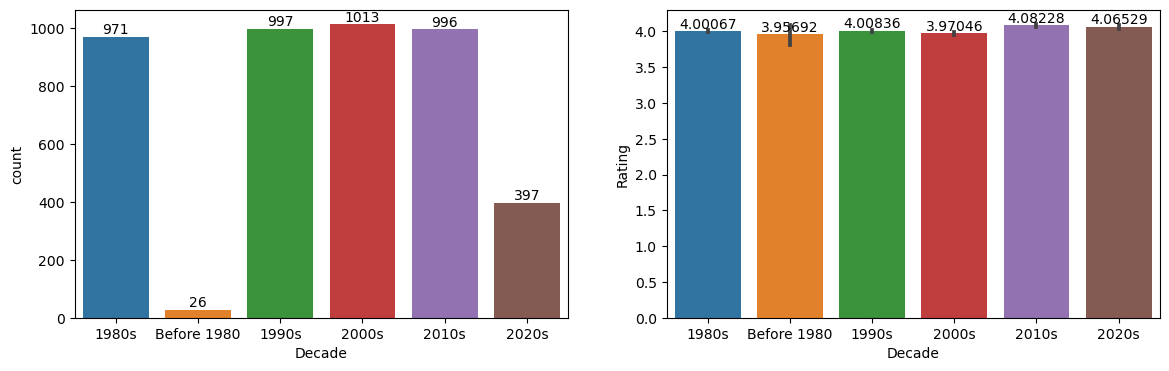

In [28]:
#Decade-wise distribution and popularity rating
f,axes = plt.subplots(1,2, figsize=(14,4))
ax = sns.countplot(x = df['Decade'], ax=axes[0])
for i in ax.containers:
    ax.bar_label(i)
ax=sns.barplot(x = df['Decade'], y = df['Rating'], ax=axes[1])
for i in ax.containers:
    ax.bar_label(i)

- Highest number of publications happened during 2000s.
- It has the lowest mean rating after the books published before 1980s.

In [29]:
#Series
df['Series'].value_counts()

0                                      2171
Chronicles of Brother Cadfael            19
In Death                                 16
Redwall                                  15
Vorkosigan Saga                          14
                                       ... 
The Princesses of Westfalin Trilogy       1
Mrs. Murphy                               1
The Strain Trilogy                        1
Glass                                     1
Sword Catcher                             1
Name: Series, Length: 1117, dtype: int64

Series can be combined with book titles as most books are not part of any series

In [30]:
#Most publications by decade
dec = ['Before 1980','1980s','1990s','2000s','2010s','2020s']
top_author = []
top_count = []
for i in dec:
    t=0
    dat = df[(df['Decade']==i)] 
    auth = dict(dat['Author'].value_counts())
    for x,y in auth.items():
        t=1
        top_author.append(x)
        top_count.append(y)
        if t==1:
            break
df_auth = pd.DataFrame({'Decade':dec, 'Top Author':top_author, 'Book Count':top_count})

In [31]:
print(df_auth)

        Decade        Top Author  Book Count
0  Before 1980      Ellis Peters           1
1        1980s      Stephen King          20
2        1990s      Nora Roberts          29
3        2000s  Charlaine Harris          12
4        2010s    Colleen Hoover          12
5        2020s     Ali Hazelwood           8


We can see decade-wise most number of publications by one author

## Data Pre-processing

In [32]:
df.head()

,Sequecence,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters,Publication_Year,Publication_Month,Primary_Genre,Decade
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"[ScienceFiction, Fiction, Humor, Fantasy, Come...","October12,1980",4.21,283375,1980,October,ScienceFiction,1980s
1,1,The Name of the Rose,0,0,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"[Fiction, HistoricalFiction, Mystery, Classics...","January1,1980",4.14,360732,1980,January,Fiction,1980s
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"[HistoricalFiction, Fiction, Fantasy, Historic...","January1,1980",4.09,264630,1980,January,HistoricalFiction,1980s
3,3,Firestarter,0,0,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"[Horror, Fiction, Thriller, ScienceFiction, Fa...","September29,1980",3.91,226270,1980,September,Horror,1980s
4,4,Cosmos,0,0,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"[Science, Nonfiction, Physics, Astronomy, Hist...","January1,1980",4.39,144686,1980,January,Science,1980s


### Keeping columns only significant for recommendation system

In [76]:
df1 = df.copy()

In [77]:
#Keeping only significant columns
df1 = df1[['Book', 'Series', 'Author',
       'Description', 'Num Pages', 'Format', 'Genres','Rating']]

In [81]:
#Combining Series name with book
c = 0
df1['Title'] = ''
for i in range(len(df1)):
    if df1['Series'][c] != '0':
        df1['Title'][c] = df1['Series'][c]+':'+df1['Book'][c]
    else:
        df1['Title'][c] = df1['Book'][c]
    c = c + 1

In [82]:
#Checking for duplicate books 
df1.duplicated(['Title','Author','Num Pages']).sum()

80

There are 80 books with the same author and same number of pages indicating repetition. These rows can be dropped.

In [85]:
df1.drop_duplicates(subset=['Title','Author','Num Pages'], inplace=True)

In [86]:
df1['Description'] = df1['Description'].apply(lambda x: x.split())

In [87]:
df1.head()

,Book,Series,Author,Description,Num Pages,Format,Genres,Rating,Title
0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,Douglas Adams,"[Facing, annihilation, at, the, hands, of, the...",250.0,Paperback,"[ScienceFiction, Fiction, Humor, Fantasy, Come...",4.21,The Hitchhiker's Guide to the Galaxy:The Resta...
1,The Name of the Rose,0,Umberto Eco,"[The, year, is, 1327., Benedictines, in, a, we...",536.0,Paperback,"[Fiction, HistoricalFiction, Mystery, Classics...",4.14,The Name of the Rose
2,The Clan of the Cave Bear,Earth's Children,Jean M. Auel,"[This, novel, of, awesome, beauty, and, power,...",512.0,Paperback,"[HistoricalFiction, Fiction, Fantasy, Historic...",4.09,Earth's Children:The Clan of the Cave Bear
3,Firestarter,0,Stephen King,"[The, Department, of, Scientific, Intelligence...",564.0,Mass Market Paperback,"[Horror, Fiction, Thriller, ScienceFiction, Fa...",3.91,Firestarter
4,Cosmos,0,Carl Sagan,"[The, story, of, fifteen, billion, years, of, ...",384.0,Mass Market Paperback,"[Science, Nonfiction, Physics, Astronomy, Hist...",4.39,Cosmos


In [89]:
df1 = df1.reset_index(drop=True)

In [90]:
#Combining Description, Author, Format and Genres into a single column
df1['Book_Info'] = df1['Description']+df1['Genres']
c = 0
for i in range(len(df1)):
    df1['Book_Info'][c].append(df1['Author'][c])
    df1['Book_Info'][c].append(df1['Format'][c])
    c=c+1

In [91]:
#Dropping Redundant columns 
#As number of pages and rating are not used in Content based recommendation system, we will drop these too
df1.drop(columns = ['Series','Book','Author','Format','Description','Genres','Num Pages','Rating'], inplace=True)

In [92]:
df1.head()

,Title,Book_Info
0,The Hitchhiker's Guide to the Galaxy:The Resta...,"[Facing, annihilation, at, the, hands, of, the..."
1,The Name of the Rose,"[The, year, is, 1327., Benedictines, in, a, we..."
2,Earth's Children:The Clan of the Cave Bear,"[This, novel, of, awesome, beauty, and, power,..."
3,Firestarter,"[The, Department, of, Scientific, Intelligence..."
4,Cosmos,"[The, story, of, fifteen, billion, years, of, ..."


In [93]:
df1.isnull().sum()/len(df1)*100

Title        0.0
Book_Info    0.0
dtype: float64

No missing values

### Cleaning the book information 

In [94]:
#Converting all book information into lower case
c=0
for i in range(len(df1)):
    df1['Book_Info'][c] = [w.lower() for w in df1['Book_Info'][c]]
    
    c=c+1

In [95]:
df1['Book_Info'] = df1['Book_Info'].apply(lambda x: " ".join(x))

In [96]:
#Removing punctuation
import string
punctuation = list(string.punctuation)
c=0
for i in range(len(df1)):
    df1['Book_Info'][c]
    for p in punctuation:
        df1['Book_Info'][c] = df1['Book_Info'][c].replace(p,'')
    c=c+1

In [97]:
df1['Book_Info'][0]

'facing annihilation at the hands of the warlike vogons is a curious time to have a cosmically displaced arthur dent and his curious comrades in arms as they hurtle through space powered by pure improbability  and desperately in search of a place to eat among arthurs motley shipmates are ford prefect a longtime friend and contributor to the the hitch hikers guide to the galaxy zaphod beeblebrox the threearmed twoheaded expresident of the galaxy tricia mcmilan a fellow earth refuge whos gone native her name is trillian now and marvin who suffers nothing and no one gladly source douglasadamscom sciencefiction fiction humor fantasy comedy classics sciencefictionfantasy douglas adams paperback'

## Feature Extraction using TF-IDF Vectorizer

In [98]:
# vectorize the text data using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [99]:
vector = tfidf.fit_transform(df1['Book_Info']).toarray()

In [100]:
vector.shape

(4320, 40579)

## Building Content based recommendation system using similarity matrix

In [101]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [102]:
similarity

array([[1.00000000e+00, 9.78036690e-03, 5.47294287e-03, ...,
        5.25895859e-03, 1.49172091e-03, 6.75280139e-03],
       [9.78036690e-03, 1.00000000e+00, 9.40834393e-03, ...,
        0.00000000e+00, 4.41761667e-03, 5.23420489e-03],
       [5.47294287e-03, 9.40834393e-03, 1.00000000e+00, ...,
        2.64686917e-02, 2.34161560e-04, 3.62629335e-03],
       ...,
       [5.25895859e-03, 0.00000000e+00, 2.64686917e-02, ...,
        1.00000000e+00, 2.68596501e-02, 1.28435337e-02],
       [1.49172091e-03, 4.41761667e-03, 2.34161560e-04, ...,
        2.68596501e-02, 1.00000000e+00, 1.62148826e-02],
       [6.75280139e-03, 5.23420489e-03, 3.62629335e-03, ...,
        1.28435337e-02, 1.62148826e-02, 1.00000000e+00]])

In [103]:
df1.head()

,Title,Book_Info
0,The Hitchhiker's Guide to the Galaxy:The Resta...,facing annihilation at the hands of the warlik...
1,The Name of the Rose,the year is 1327 benedictines in a wealthy ita...
2,Earth's Children:The Clan of the Cave Bear,this novel of awesome beauty and power is a mo...
3,Firestarter,the department of scientific intelligence aka ...
4,Cosmos,the story of fifteen billion years of cosmic e...


In [105]:
#Creating function for top-5 recommendations based on given input
def recommendation(book):
    index = df1[df1['Title']==book].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True,
                       key = lambda x :x[1])#Sorting as per descending order of similarity value other than the book itself
    for i in distances[1:6]: #Top-5 recommendations
        print(df1.iloc[i[0]].Title)

In [107]:
book_name = 'The Name of the Rose'

In [109]:
print(f"You last read: {book_name}")
print()
print('Top 5 recommendations based on what you read:')
print()
recommendation(book_name)

You last read: The Name of the Rose

Top 5 recommendations based on what you read:

The Hound and the Falcon:The Isle of Glass
How to Travel With a Salmon & Other Essays
Postscript to the Name of the Rose
Foucault's Pendulum
Harvest Book:Travels In Hyperreality


In [110]:
book_name = 'Cujo'

In [112]:
print(f"You last read: {book_name}")
print()
print('Top 5 recommendations based on what you read:')
print()
recommendation(book_name)

You last read: Cujo

Top 5 recommendations based on what you read:

Nemesis
Insomnia
Time Quintet:Many Waters
Jurassic Park:Jurassic Park
Last Question and Other Stories
